In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import scipy.stats as stats
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
from astropy.stats import sigma_clip
from astropy.modeling import functional_models, models, fitting
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
from astropy import wcs
import astropy.io.fits as fits
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.stats import signal_to_noise_oir_ccd as SNRas
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')
import matplotlib.cm as cm
#import astrometry as ast
import pyfits
import requests
import json
import os
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
import numpy.ma as ma
from astropy.table import Table, Column
import pyextract
import sewpy
import pandas as pd
from astropy import units as u
#import alipy

/home/lynge/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
quasJ = [os.path.join('/media/lynge/Lynge-Back-up/NGC7213/NGC7213H/',f) \
        for f in os.listdir('/media/lynge/Lynge-Back-up/NGC7213/NGC7213H/')]

qua1_RA_WORLD = SkyCoord('22:09:16.239  -47:09:59.95', unit=(u.hourangle, u.deg)).ra.degree
qua1_DEC_WORLD = SkyCoord('22:09:16.239  -47:09:59.95', unit=(u.hourangle, u.deg)).dec.degree

print qua1_RA_WORLD

sta1_RA_WORLD = SkyCoord('22:08:51.993  -47:10:28.64', unit=(u.hourangle, u.deg)).ra.degree #UCAC3 86-422902
sta1_DEC_WORLD = SkyCoord('22:08:51.993  -47:10:28.64', unit=(u.hourangle, u.deg)).dec.degree

sta2_RA_WORLD = SkyCoord('22:08:51.908  -47:07:20.88', unit=(u.hourangle, u.deg)).ra.degree #TYC 8438-1960-1
sta2_DEC_WORLD = SkyCoord('22:08:51.908  -47:07:20.88', unit=(u.hourangle, u.deg)).dec.degree

sta3_RA_WORLD = float('nan') #SkyCoord('05:58:11.342 -38:18:29.98', unit=(u.hourangle, u.deg)).ra.degree
sta3_DEC_WORLD = float('nan') #SkyCoord('05:58:11.342 -38:18:29.98', unit=(u.hourangle, u.deg)).dec.degree

sky1_RA_WORLD = SkyCoord('22:09:11 -47:09:05', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky1_DEC_WORLD = SkyCoord('22:09:11 -47:09:05', unit=(u.hourangle, u.deg)).dec.degree

sky2_RA_WORLD = SkyCoord('22:09:21 -47:10:54', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky2_DEC_WORLD = SkyCoord('22:09:21 -47:10:54', unit=(u.hourangle, u.deg)).dec.degree

sky3_RA_WORLD = SkyCoord('22:09:22 -47:09:21', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky3_DEC_WORLD = SkyCoord('22:09:22 -47:09:21', unit=(u.hourangle, u.deg)).dec.degree


MAG_STA1_J = 10.560
MAG_STA1_H = 10.026
MAG_STA1_K = 9.925

MAG_STA2_J = 11.588
MAG_STA2_H = 11.286
MAG_STA2_K = 11.175

MAG_STA3_J = float('nan') #11.307
MAG_STA3_H = float('nan') #10.961
MAG_STA3_K = float('nan') #10.938

MAG_err_STA1_J = 0.024
MAG_err_STA1_H = 0.024
MAG_err_STA1_K = 0.019

MAG_err_STA2_J = 0.024
MAG_err_STA2_H = 0.024
MAG_err_STA2_K = 0.024

MAG_err_STA3_J = 0.026
MAG_err_STA3_H = 0.024
MAG_err_STA3_K = 0.025

MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


332.3176625


In [3]:
def dist(mid,end):
    return np.sqrt((mid[0] - end[0])**2 + (mid[1] - end[1])**2)

In [4]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [5]:
def Basic(quasar,header):
    '''Provides a basic list of neccesities from the fits header file for use in the later \
    flux determination, it does not serve an individual purpose beyound that'''
    AGNdata = quasar #np.rot90(np.rot90(np.fliplr(quasar)))
    #header = data[0].header
    #print header
    RAstd = header['CRVAL1']
    DECstd = header['CRVAL2']
    #print RAstd, DECstd
    pixspa = header['PIXSCALE']/(3600.)
    #print pixspa
    RAstdpix = header['CRPIX1']
    DECstdpix = header['CRPIX2']
    exptime = 10 # header['EXPTIME']
    return header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime

In [6]:
def curve(quasar,header,w,center,apparature):
    '''Determines the FLUX of the stellar object given the the numpy array of the image, \
    the header of the fits file, the astropy coordinate representation, \
    the object position and the apparature of interest'''
    header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime = Basic(quasar,header)
    #AGNdata = np.swapaxes(AGNdata,0,1)
    y, x = np.ogrid[0:header['NAXIS1'],0:header['NAXIS1']]
    #w = np.swapaxes(w,0,1)
    #F_AGN = np.zeros((512,512,3)) #((int(2*apparature/pixspa)+1,int(2*apparature/pixspa)+1,3))
    #print center
    x1 = w.all_world2pix(center[0],center[1],0)
    x1,y1 = (x1[0]),(x1[1])
    if 15 < x1 < header['NAXIS1'] - 15 and 15 < y1 < header['NAXIS2'] - 15:
        try:
            mask = ((y-y1)**2 + (x-x1)**2) > (apparature/float(pixspa))**2
            AGNdata[mask] = float(0)
            mask = AGNdata == 0.
            rows = np.flatnonzero((~mask).sum(axis=1))
            cols = np.flatnonzero((~mask).sum(axis=0))
            AGNdata = AGNdata[rows.min():rows.max()+1, cols.min():cols.max()+1]
            #print apparature/float(pixspa)
        except:
            AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    else:
        AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    #if np.sum(AGNdata) < 500:
    #    AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    return AGNdata, x1, y1


In [7]:
def comp1(qua,sta):
    '''Code to determine the relation between the AGN and the Stellar flux as determined by either me \
    or by the SExtractor program respectively'''
    comp = qua/sta
    return comp

In [8]:
def SXtable(quas,aperture):
    header = pyfits.getheader(quas)
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":5, 'DETECT_MINAREA':5, 'DETECT_MAXAREA':10000, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(quas)
    return out

In [9]:
def flux(quas,aperture,main_RA_WORLD,main_DEC_WORLD):
    header = pyfits.getheader(quas)
    RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[0]
    DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[1]
    output = float('nan')
    if 15 < RAmain < header['NAXIS1'] - 15 and 15 < DECmain < header['NAXIS2'] - 15: 
        out = SXtable(quas,aperture)
        RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[0]
        DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[1]
        #print out['table']['XMODEL_IMAGE'], out['table']['YMODEL_IMAGE']
        #print RAmain, DECmain

        for j in range(len(out['table']['XMODEL_IMAGE'])):
            #output['time'][i] = header['MJD-OBS']
            if RAmain - 5. < out['table']['XMODEL_IMAGE'][j] <  RAmain + 5. and \
            DECmain - 5. < out['table']['YMODEL_IMAGE'][j] < DECmain + 5.:
                #print 'YES'
                output = out['table']['FLUX_APER'][j]
                break
    else:
        output = float('nan')
        #print 'Done'
    return output


In [10]:
def SNR(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN'])*data1_2*header['DIT']*header['NDIT']/(np.sqrt
                                                        (float(header['GAIN'])*data1_2*header['DIT']*header['NDIT'] 
                                                         + float(header['GAIN'])*npix1*data2_2*header['DIT']
                                                         *header['NDIT']
                                                         +header['NDIT']*npix1*header['RON']**2))

def SNR11(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['DIT']*header['NDIT']))

def SNR22(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN']*npix1*data2_2*header['DIT']*header['NDIT'])

def SNR33(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float((header['NDIT']*npix1*header['RON']**2))

def SNR44(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['DIT']*header['NDIT'] + 
                  header['GAIN']*npix1*data2_2*header['DIT']*header['NDIT'] +
                  header['NDIT']*npix1*header['RON']**2))

#SNRas(10.,data1_2,abs(data2_2),0,header['RON'],npix1,gain=header['GAIN'])

In [11]:
for i in range(len(quasJ)):
    data, header = fits.getdata(quasJ[i],header=True) #RA---TAN
    #print header['CTYPE2']
    #header['CTYPE1'] = "RA---TAN"
    #header['CTYPE2'] = "DEC--TAN"
    header['NDIT'] = 5
    '''header['A_ORDER'] = "0"
    header['B_ORDER'] = "0"
    header['AP_ORDER'] = "0"
    header['BP_ORDER'] = "0"
    header['A_0_2'] = "0"
    header['A_1_1'] = "0"
    header['A_2_0'] = "0"
    header['B_0_2'] = "0"
    header['B_1_1'] = "0"
    header['B_2_0'] = "0"
    header['AP_0_2'] = "0"
    header['AP_1_1'] = "0"
    header['AP_2_0'] = "0"
    header['AP_0_1'] = "0"
    header['AP_1_0'] = "0"
    header['BP_0_1'] = "0"
    header['BP_0_2'] = "0"
    header['BP_1_0'] = "0"
    header['BP_1_1'] = "0"
    header['BP_2_0'] = "0"'''
    fits.writeto(quasJ[i],data,header,clobber=True)
    #print fits.getheader(quasH[i])['A_ORDER']

In [12]:
def error(SIGNAL_AGN,SIGNAL_STAR,SNR_AGN,SNR_STAR,STAR_MAG,STAR_MAG_err,VEGA_FLUX,VEGA_MAG):
    
    SIGNAL_ERR = abs(SIGNAL_AGN/SIGNAL_STAR)*np.sqrt(SNR_AGN**(-2) + SNR_STAR**(-2))
    
    FLUX_CAL_ERR = STAR_MAG_err
    
    SIGNAL = VEGA_FLUX*10**((VEGA_MAG-STAR_MAG)/2.5)
    
    FLUX_CAL = abs(SIGNAL_AGN/SIGNAL_STAR)*VEGA_FLUX*((np.log(10)/2.5)*10**((VEGA_MAG - STAR_MAG)/2.5))
    
    return np.sqrt((SIGNAL**2*SIGNAL_ERR**2 + FLUX_CAL**2*FLUX_CAL_ERR**2))

In [13]:
def relerror(SIGNAL_AGN,SIGNAL_STAR,SNR_AGN,SNR_STAR,STAR_MAG,STAR_MAG_err,VEGA_FLUX,VEGA_MAG):
    
    SIGNAL_ERR = abs(SIGNAL_AGN/SIGNAL_STAR)*np.sqrt(SNR_AGN**(-2) + SNR_STAR**(-2))
    
    SIGNAL = VEGA_FLUX*10**((VEGA_MAG-STAR_MAG)/2.5)
    
    return np.sqrt((SIGNAL**2*SIGNAL_ERR**2))

In [14]:
def SEXAGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.003
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    comp_array = np.zeros((len(quas),6))
    SNR_array = np.zeros((len(quas),8))
    SNR_part = np.zeros((len(quas),5))
    SNR_star = np.zeros((len(quas),4))
    noise_quasar = np.zeros((len(quas),7))
    signal = np.zeros((len(quas),4))
    #-----------------------------------------------------------------------------------------------
    for i in range(len(quas)):
        print 'Frame nr. ', i, quas[i]
        header = pyfits.getheader(quas[i])
        a_AGN = flux(quas[i],2*aperture1,qua1_RA_WORLD,qua1_DEC_WORLD)/header['DIT']
        a2 = flux(quas[i],2*aperture1,sta1_RA_WORLD,sta1_DEC_WORLD)/header['DIT']
        a3 = flux(quas[i],2*aperture1,sta2_RA_WORLD,sta2_DEC_WORLD)/header['DIT']
        a4 = flux(quas[i],2*aperture1,sta3_RA_WORLD,sta3_DEC_WORLD)/header['DIT']
        a_sky1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky1_RA_WORLD,sky1_DEC_WORLD),aperture1)[0]/header['DIT']
        a_sky2 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky2_RA_WORLD,sky2_DEC_WORLD),aperture1)[0]/header['DIT']
        a_sky3 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky3_RA_WORLD,sky3_DEC_WORLD),aperture1)[0]/header['DIT']
        #a_AGN_1 = flux(quas[i],2*aperture2,qua1_RA_WORLD,qua1_DEC_WORLD)/header['DIT']
        #a2_1 = flux(quas[i],2*aperture2,sta1_RA_WORLD,sta1_DEC_WORLD)/header['DIT']
        #a3_1 = flux(quas[i],2*aperture2,sta2_RA_WORLD,sta2_DEC_WORLD)/header['DIT']
        #a4_1 = flux(quas[i],2*aperture2,sta3_RA_WORLD,sta3_DEC_WORLD)/header['DIT']
        signal[i,0] = a_AGN
        signal[i,1] = a2
        signal[i,2] = a3
        signal[i,3] = a4
        #-------------------------------------------------------------------------------------------
        #plt.figure(figsize=(3,3))
        #plt.imshow(a2)
        #plt.show()
        #-------------------------------------------------------------------------------------------
        a_AGN_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a2_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a3_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a4_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a_sky_pix = np.count_nonzero(a_sky1)
        a_sky_2 = np.sum(a_sky1)/float(np.count_nonzero(a_sky1))
        a_sky = np.concatenate((a_sky1.ravel(),a_sky2.ravel(),a_sky3.ravel()),axis=0)
        a_sky_var = np.nanvar(a_sky)
        print a_sky_2,a_sky_var
        #a_AGN_pix_1 = np.pi*(2*aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a2_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a3_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a4_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a_AGN_2 = (np.sum(a_AGN_1) - np.sum(a_AGN))/(float(np.count_nonzero(a_AGN_1)) - float(np.count_nonzero(a_AGN)))
        #a2_2 = (np.sum(a2_1) - np.sum(a2))/(float(np.count_nonzero(a2_1)) - float(np.count_nonzero(a2)))
        #a3_2 = (np.sum(a3_1) - np.sum(a3))/(float(np.count_nonzero(a3_1)) - float(np.count_nonzero(a3)))
        #a4_2 = (np.sum(a4_1) - np.sum(a4))/(float(np.count_nonzero(a4_1)) - float(np.count_nonzero(a4)))
        a_AGN_3 = a_AGN/a_AGN_pix #- (a_AGN_1 - a_AGN)/(a_AGN_pix_1 - a_AGN_pix) #Background subtracted flux/pixel/sec
        a2_3 = a2/a2_pix #- (a2_1 - a2)/(a2_pix_1 - a2_pix)
        a3_3 = a3/a3_pix #- (a3_1 - a3)/(a3_pix_1 - a3_pix)
        a4_3 = a4/a4_pix #- (a4_1 - a4)/(a4_pix_1 - a4_pix)
        #-------------------------------------------------------------------------------------------
        date.append(header['MJD-OBS'])
        #-------------------------------------------------------------------------------------------
        poissonAGN.append(np.sqrt(np.sum(a_AGN)*header['DIT']*header['GAIN'])) #header['DIT']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['DIT']*header['GAIN'])) #header['DIT']))
        poisson22.append(np.sqrt(np.sum(a3)*header['DIT']*header['GAIN'])) #header['DIT']))
        poisson529.append(np.sqrt(np.sum(a4)*header['DIT']*header['GAIN'])) #header['DIT']))
        #-------------------------------------------------------------------------------------------
        #if SNR1[i] < 70:
        #    flucompsta_AGN.append(float('nan'))
        #    flucompsta2.append(float('nan'))
        #    flucompsta3.append(float('nan'))
        #    flucompsta4.append(float('nan'))
        #    flucompsta6.append(float('nan'))
        #    comp_array[i,0] = int(date[i])
        #    comp_array[i,1] = float('nan')
        #    comp_array[i,2] = float('nan')
        #    comp_array[i,3] = float('nan')
        #else:
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        SNR1 = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        #flucompsta4.append(comp1(a_AGN_3,a5_3))
        #flucompsta5.append(comp1(a_AGN_3,a6_3))
        #flucompsta6.append(comp1(a_AGN_3,a7_3))
        comp_array[i,0] = int(date[i])
        comp_array[i,1] = flucompsta1[i]
        comp_array[i,2] = flucompsta2[i]
        comp_array[i,3] = flucompsta3[i]
        comp_array[i,4] = SNR1
        comp_array[i,5] = a_AGN
        #comp_array[i,5] = flucompsta5[i]
        #comp_array[i,6] = flucompsta6[i]
        print a_AGN, a2, a3, a4
        SNR_part[i,0] = date[i]
        SNR_part[i,1] = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,2] = SNR11(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,3] = SNR22(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,4] = SNR33(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,0] = header['MJD-OBS']
        SNR_star[i,1] = SNR(a2,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,2] = SNR(a3,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,3] = SNR(a4,np.sum(a_sky),header,aperture1,aperture1)
        noise_quasar[i,0] = header['MJD-OBS']
        noise_quasar[i,1] = float('nan')
        noise_quasar[i,2] = float('nan')
        noise_quasar[i,3] = float('nan')
        #SNR_array[i,0] = int(date[i])
        #SNR_array[i,1] = SNR(a_AGN,a_sky,header,aperture1,aperture1)
        #SNR_array[i,2] = SNR(a2,a_sky,header,aperture1,aperture1)
        #SNR_array[i,3] = SNR(a3,a_sky,header,aperture1,aperture1)
        #SNR_array[i,4] = SNR(a4,a_sky,header,aperture1,aperture1)
        #SNR_array[i,5] = SNR(a5,a_sky,header,aperture1,aperture1)
        #SNR_array[i,6] = SNR(a6,a_sky,header,aperture1,aperture1)
        #SNR_array[i,7] = SNR(a7,a_sky,header,aperture1,aperture1)
    #print 'YES'
    #-----------------------------------------------------------------------------------------------
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    comp_array = comp_array[comp_array[:,0].argsort()]
    
    comp_array[:,1] = comp_array[:,1]*flux_cal(MAG_STA1_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    comp_array[:,2] = comp_array[:,2]*flux_cal(MAG_STA2_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    comp_array[:,3] = comp_array[:,3]*flux_cal(MAG_STA3_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    
    noise_quasar[:,1] = error(signal[:,0],signal[:,1],SNR_part[:,1],SNR_star[:,1],MAG_STA1_H,\
                              MAG_err_STA1_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)
    noise_quasar[:,2] = error(signal[:,0],signal[:,2],SNR_part[:,1],SNR_star[:,2],MAG_STA2_H,\
                              MAG_err_STA2_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)
    noise_quasar[:,3] = error(signal[:,0],signal[:,3],SNR_part[:,1],SNR_star[:,3],MAG_STA3_H,\
                              MAG_err_STA3_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)
    
    noise_quasar[:,4] = relerror(signal[:,0],signal[:,1],SNR_part[:,1],SNR_star[:,1],MAG_STA1_H,\
                              MAG_err_STA1_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)
    noise_quasar[:,5] = relerror(signal[:,0],signal[:,2],SNR_part[:,1],SNR_star[:,2],MAG_STA2_H,\
                              MAG_err_STA2_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)
    noise_quasar[:,6] = relerror(signal[:,0],signal[:,3],SNR_part[:,1],SNR_star[:,3],MAG_STA3_H,\
                              MAG_err_STA3_H,FLUX_LAMBDA_VEGA_H,MAG_VEGA_H)

    #-----------------------------------------------------------------------------------------------
    return comp_array,SNR_array,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,SNR_part,SNR_star,noise_quasar

In [15]:
comp_array,SNR_array,ABS_FLUX_LAMBDA_1_1,ABS_FLUX_LAMBDA_2_1,ABS_FLUX_LAMBDA_3_1,\
ABS_FLUX_V_1_1,ABS_FLUX_V_2_1,ABS_FLUX_V_3_1,date_1,SNR_part_1,SNR_star_1,noise_quasar_1 = SEXAGNflux(quasJ,0.001)

Frame nr.  0 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/.fuse_hidden00000cef00000066


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
No handlers could be found for logger "sewpy.sewpy"


-0.708333333333 1.83902825836
nan nan nan nan
Frame nr.  1 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/.fuse_hidden0000162100000141


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


0.133333333333 0.947704903978
14623.06 nan nan nan
Frame nr.  2 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/.fuse_hidden0000174a00000194
-0.708333333333 1.83902825836
nan nan nan nan
Frame nr.  3 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits
-0.257692307692 1.76169550173
12772.69 nan nan nan
Frame nr.  4 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(1)
-0.529166666667 0.824578993056
12925.49 5442.18 1815.471 nan
Frame nr.  5 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(10)
-0.0444444444444 0.481158208381
12963.37 5548.842 1845.624 nan
Frame nr.  6 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(11)
-0.5 0.803680555556
8841.755 3710.097 1231.054 nan
Frame nr.  7 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(12)
-0.00833333333333 0.530203993056
nan nan nan nan
Frame nr.  8 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(13)
-0.189285714286 0.671301944946
14913.31 nan nan nan
Frame nr.

-0.185185185185 0.783123914931
14705.6 5931.294 1981.987 nan
Frame nr.  62 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(65)
0.084 0.593803344867
nan nan nan nan
Frame nr.  63 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(66)
0.525 0.628286236063
14901.87 6032.626 1967.021 nan
Frame nr.  64 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(67)
-0.266666666667 0.740709019204
11450.25 4614.432 1489.919 nan
Frame nr.  65 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(68)
0.166666666667 0.391429183813
9764.701 nan nan nan
Frame nr.  66 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(69)
-0.195833333333 0.272517146776
15041.82 nan nan nan
Frame nr.  67 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(7)
-0.824999945504 1.49003
8674.992 3553.931 1122.719 nan
Frame nr.  68 /media/lynge/Lynge-Back-up/NGC7213/NGC7213H/NGC7213_2_10_H.fits(70)
-0.0708333333333 0.398931206597
14937.85 nan nan nan
Fram

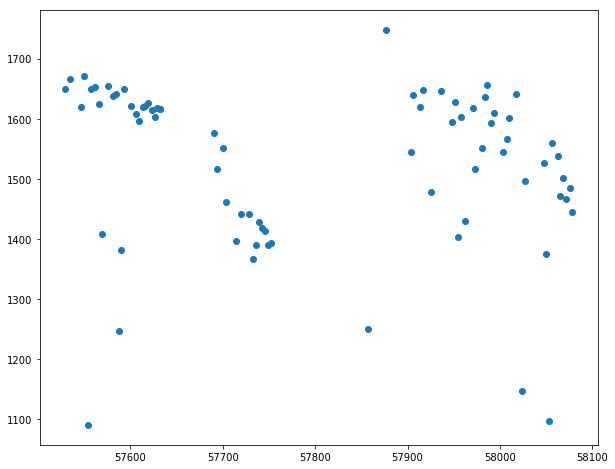

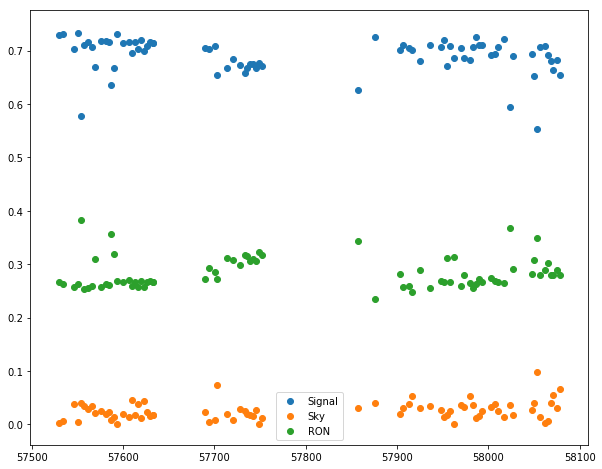

[           nan  1616.88666689            nan  1445.14028634  1484.60612794
  1496.21208847  1147.21690698            nan  1640.6439516   1601.26722386
  1566.21506614  1544.8759347             nan  1609.60605382  1592.77272244
  1465.73045968  1655.97613279  1635.66784662  1551.37328566  1516.7627573
  1617.20577856  1429.58389252  1602.68504233  1627.80032815  1595.35656284
  1501.99187589            nan  1646.40629426            nan  1478.09957044
  1647.08593479  1619.25794457  1639.40782976  1545.26734853  1748.27820933
  1249.72027626  1471.77579089  1392.93983142  1413.72903057  1418.56228219
  1427.38605482  1390.49711244  1366.43263846  1441.02774659            nan
  1441.54862373  1537.46222431  1396.04690327  1461.79840574  1551.23946639
  1515.96445076  1576.2926681   1616.88666689  1603.07645617  1613.92163906
  1626.42520501  1559.13411905  1620.47327583  1618.7986538   1596.53329127
  1607.63641372  1621.66317435            nan  1650.35211001  1382.24616562
  1246.621859

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2],label='Signal')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3],label='Sky')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,4],label='RON')
plt.legend()
#plt.ylim([5*10**(-15),1.*10**(-14)])
plt.show()

print SNR_part_1[:,1]


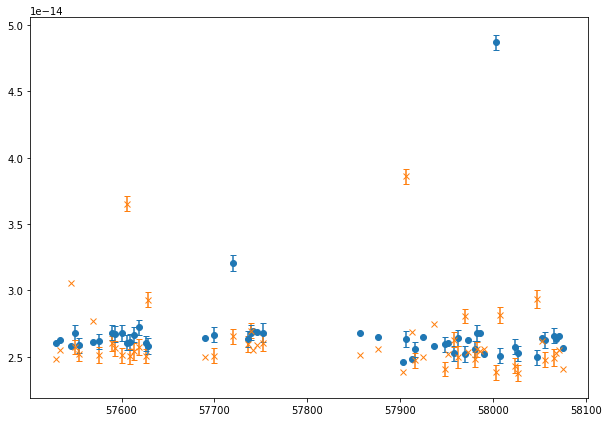

/home/lynge/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


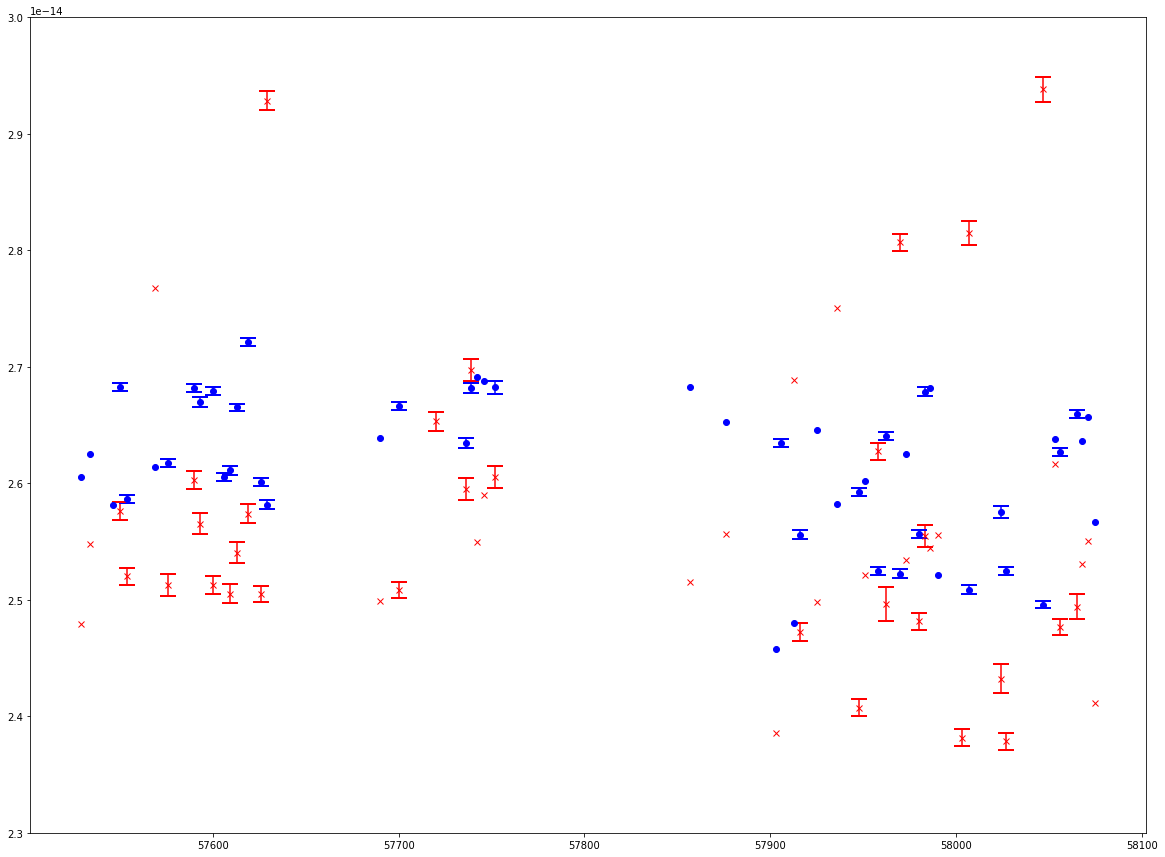

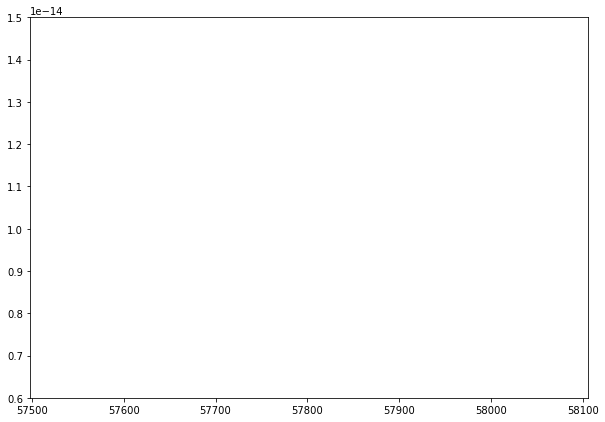

In [17]:

plt.figure(figsize=(10,7))
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,1],fmt='o',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,2],fmt='x',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,3],fmt='*',capsize=3)
#plt.ylim([3*10**(-15),0.45*10**(-14)])
plt.show()

plt.figure(figsize=(20,15))
#plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,1],fmt='o',capsize=3,color='b',label='STA1')
#plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,2],fmt='x',capsize=3,color='r',label='STA2')
#plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,3],fmt='*',capsize=3,color='g',label='STA3')
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,4],fmt='o',capsize=8,capthick=2,color='b')
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,5],fmt='x',capsize=8,capthick=2,color='r')
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,6],fmt='*',capsize=8,capthick=2,color='g')
plt.legend()
plt.ylim([23*10**(-15),3*10**(-14)])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,1])
plt.scatter(comp_array[:,0],comp_array[:,2])
plt.scatter(comp_array[:,0],comp_array[:,3])
plt.ylim([6*10**(-15),1.5*10**(-14)])
plt.show()

np.savetxt('../NOVEMBER/NGC7213_NOISE_H.txt',noise_quasar_1)
np.savetxt('../NOVEMBER/NOV-NGC7213-H',comp_array)
np.savetxt('../NOVEMBER/NGC7213_SNR_H.txt',SNR_part_1)

In [18]:
flucompsta1,flucompsta2,flucompsta3,flucompsta4,flucompsta5,flucompsta6,flucompsta7,\
SNR1,SNR2,SNR3,SNR4,SNR5,SNR_comp,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,ABS_FLUX_V_1,\
ABS_FLUX_V_2,ABS_FLUX_V_3,date,poissonAGN,poissonHD,poisson22,poisson529,SNR_test,file1,SNR_part \
= AGNflux(quasJ,0.001)

NameError: name 'AGNflux' is not defined

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(comp_array[:,0],comp_array[:,4])
plt.show()

print comp_array[:,4]

In [ ]:
plt.figure(figsize=(20,14))
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_2),marker='x',\
            color='r',label='Flux found from Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3),marker='x',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.scatter(date_1,ABS_FLUX_LAMBDA_1_1,marker='o',\
            color='b',label='Flux found from SEX HD101274')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_2_1),marker='o',\
            color='r',label='Flux found from SEX Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3_1),marker='o',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
plt.ylim([0.85*10**(-14),1.4*10**(-14)])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
plt.scatter(date,np.array(SNR1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
#plt.ylim([0.15,0.20])
#plt.xlim([57850,57880])
plt.legend()
plt.show()



In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,4])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,3])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3])
plt.show()


In [ ]:
print np.argmax(SNR_test[:,1])

for i in range(len(file1)):
    print i, '{0:f}'.format(SNR_test[i,0]), '{0:f}'.format(SNR_test[i,1]), '{0:f}'.format(SNR_test[i,2])
    print file1[i]